# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lectura y muestra de datos

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Modificación de los datos

In [4]:
df['sex'] = df['sex'].replace(('male','female'), (0, 1))
df['smoker'] = df['smoker'].replace(('no', 'yes'), (0,1))
df['region'] = df['region'].replace('northeast', 0).replace('northwest', 1).replace('southeast', 2).replace('southwest', 3)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [6]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [7]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Normalización de los datos

In [8]:
df_max_scaled = X.copy()

for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
X = df_max_scaled
X

,age,sex,bmi,children,smoker,region
0,0.296875,1.0,0.525127,0.0,1.0,1.000000
1,0.281250,0.0,0.635611,0.2,0.0,0.666667
2,0.437500,0.0,0.621118,0.6,0.0,0.666667
3,0.515625,0.0,0.427348,0.0,0.0,0.333333
4,0.500000,0.0,0.543572,0.0,0.0,0.333333
...,...,...,...,...,...,...
1333,0.781250,0.0,0.582910,0.6,0.0,0.333333
1334,0.281250,1.0,0.600791,0.0,0.0,0.000000
1335,0.281250,1.0,0.693582,0.0,0.0,0.666667
1336,0.328125,1.0,0.485601,0.0,0.0,1.000000


# Normal Equation

## Selección de datos de prueba y entrenamiento
### Estos datos nos servirán para todas las regresiones

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=80)

In [11]:
m = len(X_train)
m

1070

In [12]:
X_new = np.c_[np.ones((m, 1)), X_train]
X_new

array([[1.        , 0.5625    , 1.        , ..., 0.6       , 0.        ,
        0.        ],
       [1.        , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.66666667],
       [1.        , 0.75      , 0.        , ..., 0.6       , 0.        ,
        1.        ],
       ...,
       [1.        , 0.5       , 0.        , ..., 0.4       , 0.        ,
        0.66666667],
       [1.        , 0.28125   , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.484375  , 1.        , ..., 0.4       , 0.        ,
        1.        ]])

In [13]:
theta = np.linalg.inv(X_new.T @ X_new) @ (X_new.T @ y_train)
theta

array([-11295.56612001,  16091.35132034,    150.96076941,  17582.73924283,
         2357.15224219,  24019.89970563,  -1666.71595197])

In [14]:
X_new_t = np.c_[np.ones((len(X_test), 1)), X_test]
y_predicted = X_new_t @ theta

<function matplotlib.pyplot.show(close=None, block=None)>

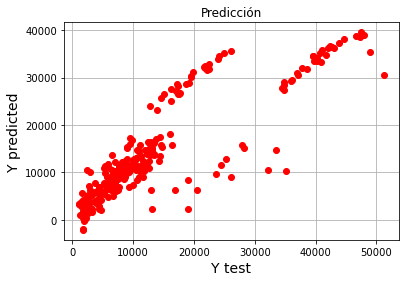

In [15]:
plt.plot(y_test, y_predicted, 'ro', linewidth = 5)
plt.title('Predicción')
plt.xlabel('Y test', fontsize = 14)
plt.ylabel('Y predicted', fontsize = 14)
plt.grid()
plt.show

#### Verificación con Sklearn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.intercept_, model.coef_

(-11295.566120011683,
 array([16091.35132034,   150.96076941, 17582.73924283,  2357.15224219,
        24019.89970563, -1666.71595197]))

In [19]:
y_predicted = model.predict(X_test)

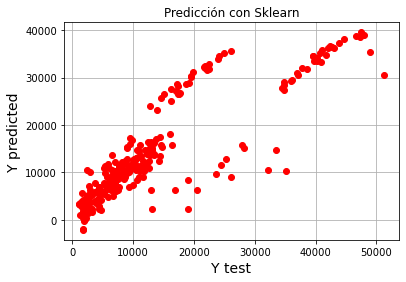

In [20]:
plt.plot(y_test, y_predicted, 'ro', linewidth = 5)
plt.title('Predicción con Sklearn')
plt.xlabel('Y test', fontsize = 14)
plt.ylabel('Y predicted', fontsize = 14)
plt.grid()
plt.show()

# Batch Gradient Descent

In [21]:
n_iteration = 7000
eta = 0.001

In [22]:
J_log_b = np.zeros(n_iteration)
thetas = np.zeros(X_train.shape[1])
for n in range(n_iteration):
    J_log_b[n] = (1 / 2 * m) * ((X_train @ thetas - y_train)**2).sum()
    gradients = (1 / m) * (X_train.T @ (X_train @ thetas - y_train))
    thetas = thetas - eta*gradients

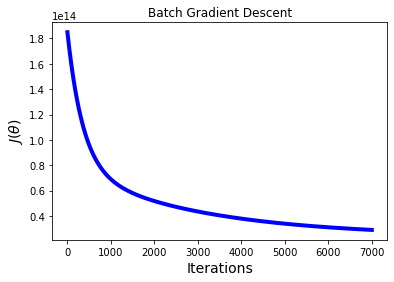

In [23]:
plt.plot(range(n_iteration), J_log_b, 'b-', linewidth = 4)
plt.title('Batch Gradient Descent')
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel(r'$J(\theta)$', fontsize = 14)
plt.show()

# Stocastic Gradient Descent

In [24]:
m_lim = len(y_train)
m_lim

1070

In [25]:
eta = 100

In [26]:
t0 = 5
t1 = 60

In [27]:
J_log_s = [0] * eta
thetas = np.zeros(X_train.shape[1])
for e in range(eta):
    for n in range(len(y_train)):
        random_n = np.random.randint(len(y_train))
        x_rand = X_train[random_n:random_n+1]
        y_rand = y_train[random_n:random_n+1]
        gradients = 2 * (x_rand.T @ (x_rand @ thetas - y_rand))
        eta_aux = t0 / (t1 + e*len(y_train) + n)
        thetas = thetas - eta_aux*gradients
        J_log_s[e] = (1 / 2 * m) * ((X_train @ thetas - y_train)**2).sum() 

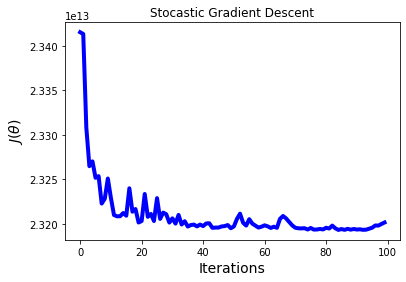

In [28]:
plt.plot(range(eta), J_log_s, 'b-', linewidth = 4)
plt.title('Stocastic Gradient Descent')
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel(r'$J(\theta)$', fontsize = 14)
plt.show()

# Mini Batch Gradient Descent

In [29]:
eta = 100

In [30]:
t0 = 5
t1 = 60

In [31]:
batch_size = 65

In [32]:
J_log_m = [0] * eta
thetas = np.zeros(X_train.shape[1])
for e in range(eta):
    for n in range(0, m, batch_size):
        x_batch = X_train[n:batch_size][:]
        y_batch = y_train[n:batch_size]
        gradients = (1 / m) * (x_batch.T @ (x_batch @ thetas - y_batch))
        eta_aux = t0 / (t1 + e*len(y_train) + n)
        thetas = thetas - eta_aux*gradients
        J_log_m[e] = (1 / 2 * m) * ((X_train @ thetas - y_train)**2).sum()

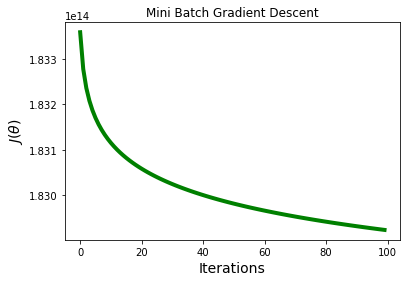

In [33]:
plt.plot(range(eta), J_log_m, 'g-', linewidth = 4)
plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel(r'$J(\theta)$', fontsize = 14)
plt.show()